# Loading libraries

In [51]:
import numpy as np
import pandas as pd

import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Display setting
pd.set_option('max_colwidth', 800)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Loading dataset

In [3]:
# taking a look at the 1st 3 lines of the 600 MB file -> to understand the structure of the file content
# using linux head command instead of directly loading into the pandas

!head -3 ./transactions.txt

{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-08-13T14:27:32", "transactionAmount": 98.55, "merchantName": "Uber", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "02", "posConditionCode": "01", "merchantCategoryCode": "rideshare", "currentExpDate": "06/2023", "accountOpenDate": "2015-03-14", "dateOfLastAddressChange": "2015-03-14", "cardCVV": "414", "enteredCVV": "414", "cardLast4Digits": "1803", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-10-11T05:05:54", "transactionAmount": 74.51, "merchantName": "AMC #191138", "acqCountry": "US", "merchan

In [4]:
data_path = './transactions.txt'

# dataframe
df = pd.read_json(data_path,lines=True)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


# Data understanding & Data descriptions

## Data check for missing values and duplicates

In [5]:
# number of records, number of fields
len(df),len(df.columns)

(786363, 29)

In [6]:
# data information (along with data types)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
# converting bool data types to int

df["cardPresent"] = df["cardPresent"].astype(int)
df["expirationDateKeyInMatch"] = df["expirationDateKeyInMatch"].astype(int)
df["isFraud"] = df["isFraud"].astype(int)

In [8]:
# converting date type colms to pd.datetime object

df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])

Above information shows all values to be non null BUT manual inspection of records show blank merchantCity

Need to investigate further - Unique values corresponding to object type columns

In [9]:
# checking duplicate entries in the dataset

df.duplicated().sum()

0

> There are no duplicates in the dataset

## Checking unique values

In [10]:
# checking the unique values in the merchant City column

df['merchantCity'].unique()

array([''], dtype=object)

In [11]:
# collecting all the columns with are non numerical types

object_cols = df.select_dtypes(include = "object").columns

len(object_cols)

13

In [12]:
# For object columns - checking the unique values correponding to each of the columns 

for col in object_cols:
    print(col,df[col].nunique(),sep = "  --  ")

merchantName  --  2490
acqCountry  --  5
merchantCountryCode  --  5
posEntryMode  --  6
posConditionCode  --  4
merchantCategoryCode  --  19
transactionType  --  4
echoBuffer  --  1
merchantCity  --  1
merchantState  --  1
merchantZip  --  1
posOnPremises  --  1
recurringAuthInd  --  1


In [13]:
# Checking unique values of col which have less than 10 unique values and their corresponding data counts

low_uniuqe_cols = []

for col in object_cols:
    if df[col].nunique() < 10:
        low_uniuqe_cols.append(col)
        
len(low_uniuqe_cols)

11

In [14]:
for col in low_uniuqe_cols:
    print(col)
    print(df[col].unique())
    print()

acqCountry
['US' '' 'CAN' 'MEX' 'PR']

merchantCountryCode
['US' 'CAN' '' 'PR' 'MEX']

posEntryMode
['02' '09' '05' '80' '90' '']

posConditionCode
['01' '08' '99' '']

transactionType
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']

echoBuffer
['']

merchantCity
['']

merchantState
['']

merchantZip
['']

posOnPremises
['']

recurringAuthInd
['']



> All the columns have missing values (disguised as " ") -> Similarly need to check the numerical data cols for such disguise

In [15]:
# looking at the unique value counts

for col in low_uniuqe_cols:
    print(col)
    print(df[col].value_counts())
    print()

acqCountry
US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: merchantCountryCode, dtype: int64

posEntryMode
05    315035
09    236481
02    195934
90     19576
80     15283
        4054
Name: posEntryMode, dtype: int64

posConditionCode
01    628787
08    149634
99      7533
         409
Name: posConditionCode, dtype: int64

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

echoBuffer
    786363
Name: echoBuffer, dtype: int64

merchantCity
    786363
Name: merchantCity, dtype: int64

merchantState
    786363
Name: merchantState, dtype: int64

merchantZip
    786363
Name: merchantZip, dtype: int64

posOnPremises
    786363
Name: posOnPremises, dtype: int64

recurringAuthInd
    786363
Name: recurringAuthInd, dtype: 

> Above data shows below missing values corresponding to columns

    * acqCountry has -> 4562
    * merchantCountryCode -> 724
    * posEntryMode -> 4054
    * posConditionCode -> 409
    * transactionType -> 698


In [16]:
# collecting redundant columns (unique value is 1) as they provide no extra information 

redundant_cols = []

for col in object_cols:
    if df[col].nunique() == 1:
        redundant_cols.append(col)
        
len(redundant_cols),redundant_cols

(6,
 ['echoBuffer',
  'merchantCity',
  'merchantState',
  'merchantZip',
  'posOnPremises',
  'recurringAuthInd'])

In [17]:
# dropping redundant cols from the dataset

df = df.drop(redundant_cols,axis= 1)

df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,0,0,0
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,1,0,0
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,0,0,0
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,0,0,0
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,1,0,0


> Above analysis for NON OBJECT data types

In [18]:
# collecting all the columns with are non string types

non_object_cols = df.select_dtypes(exclude = "object").columns

len(non_object_cols)

16

In [19]:
# For Non object columns - checking the unique values correponding to each of the columns 

for col in non_object_cols:
    print(col,df[col].nunique(),sep = "  --  ")

accountNumber  --  5000
customerId  --  5000
creditLimit  --  10
availableMoney  --  521915
transactionDateTime  --  776637
transactionAmount  --  66038
currentExpDate  --  165
accountOpenDate  --  1820
dateOfLastAddressChange  --  2184
cardCVV  --  899
enteredCVV  --  976
cardLast4Digits  --  5245
currentBalance  --  487318
cardPresent  --  2
expirationDateKeyInMatch  --  2
isFraud  --  2


> Some obsevations abou the data

    * There are 5000 unique account Numbers 
    * There are 5000 unique customer ids
    * 899 and 976 card CVV and entered CVV

In [20]:
# Checking unique values of col which have less than 10 unique values and their corresponding data counts

low_uniuqe_cols = []

for col in non_object_cols:
    if df[col].nunique() < 11:
        low_uniuqe_cols.append(col)
        
len(low_uniuqe_cols)

4

In [21]:
for col in low_uniuqe_cols:
    print(col)
    print(df[col].unique())
    print()

creditLimit
[ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]

cardPresent
[0 1]

expirationDateKeyInMatch
[0 1]

isFraud
[0 1]



In [22]:
# looking at the unique value counts

for col in low_uniuqe_cols:
    print(col)
    print(df[col].value_counts())
    print()

creditLimit
5000     201863
15000    139307
7500      97913
2500      75429
20000     68629
10000     56889
50000     48781
1000      36430
250       34025
500       27097
Name: creditLimit, dtype: int64

cardPresent
0    433495
1    352868
Name: cardPresent, dtype: int64

expirationDateKeyInMatch
0    785320
1      1043
Name: expirationDateKeyInMatch, dtype: int64

isFraud
0    773946
1     12417
Name: isFraud, dtype: int64



## data description

In [23]:
df.select_dtypes(exclude = "object").describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089,0.448734,0.001326,0.015790
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068,0.497365,0.036395,0.124664
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000,0.000000,0.000000,0.000000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000,0.000000,0.000000,0.000000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000,1.000000,0.000000,0.000000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000,1.000000,1.000000,1.000000


> Max transcation amount = 2011

> If time permits - 

    * Duplicates in cardCVV, enteredCVV -> does mismatched CVV and enteredCVV have correlation ?
    * Does each UNIQUE customer has UNIQUE account number ???

##### 1.57 % of transcations are labelled as Fraud

In [24]:
(df['isFraud'].sum()/len(df['isFraud'])) * 100

1.579041740264992

# Plotting of data points

<AxesSubplot: xlabel='transactionAmount', ylabel='Density'>

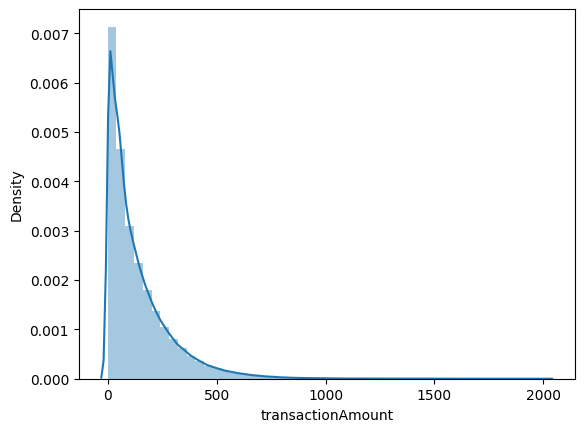

In [25]:
# plotting transaction amount 

sns.distplot(df['transactionAmount'])

In [26]:
# transactionAmount skewness

df['transactionAmount'].skew()

2.092246264815964

> This makes sense and people usually make small transcations and high transcations are rare

## Plotting other numerical columns

In [27]:
low_uniuqe_cols # in non object type cols

['creditLimit', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud']

<AxesSubplot: title={'center': 'creditLimit'}>

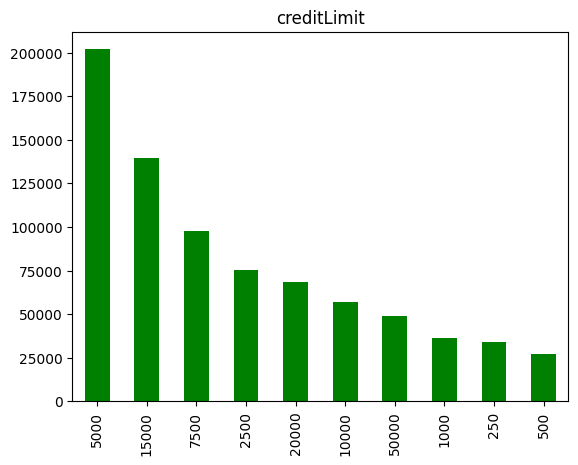

In [28]:
ind = 0
df[low_uniuqe_cols[ind]].value_counts().plot(kind='bar', color='green',title = low_uniuqe_cols[ind])

> 5000 credit limit card is most issued

<AxesSubplot: title={'center': 'cardPresent'}>

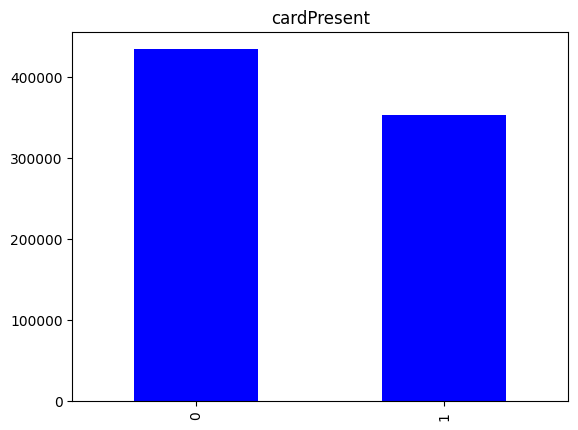

In [29]:
ind = 1
df[low_uniuqe_cols[ind]].value_counts().plot(kind='bar', color='blue',title = low_uniuqe_cols[ind])

<AxesSubplot: title={'center': 'expirationDateKeyInMatch'}>

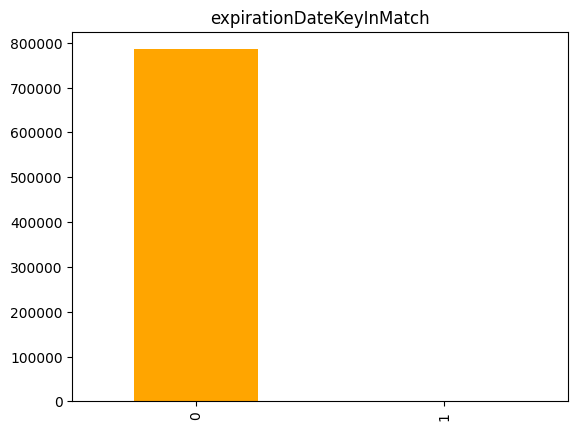

In [30]:
ind = 2
df[low_uniuqe_cols[ind]].value_counts().plot(kind='bar', color='orange',title = low_uniuqe_cols[ind])

<AxesSubplot: title={'center': 'isFraud'}>

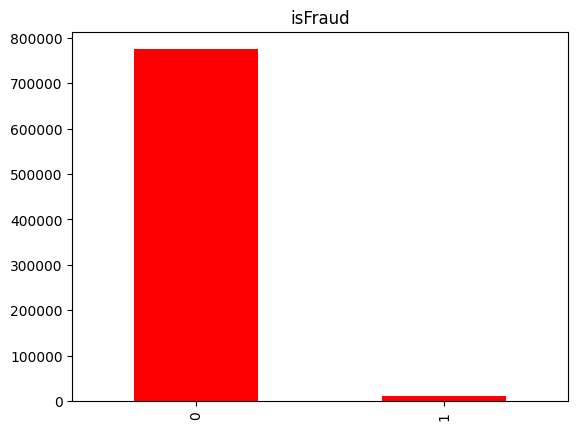

In [31]:
ind = 3
df[low_uniuqe_cols[ind]].value_counts().plot(kind='bar', color='red',title = low_uniuqe_cols[ind])

## Looking at the fraud transactions across credit limit

In [32]:
df.groupby('creditLimit')['isFraud'].sum()

creditLimit
250       407
500       465
1000      546
2500     1116
5000     3527
7500     1290
10000     766
15000    2545
20000     914
50000     841
Name: isFraud, dtype: int64

In [33]:
df.groupby('creditLimit')['isFraud'].count()

creditLimit
250       34025
500       27097
1000      36430
2500      75429
5000     201863
7500      97913
10000     56889
15000    139307
20000     68629
50000     48781
Name: isFraud, dtype: int64

In [34]:
((df.groupby('creditLimit')['isFraud'].sum()/df.groupby('creditLimit')['isFraud'].count())*100)

creditLimit
250      1.196179
500      1.716057
1000     1.498765
2500     1.479537
5000     1.747225
7500     1.317496
10000    1.346482
15000    1.826900
20000    1.331799
50000    1.724032
Name: isFraud, dtype: float64

> 15K cards have the highest fraud percentage

> 250$ have the lowest

<AxesSubplot: title={'center': '% Fraud'}, xlabel='creditLimit'>

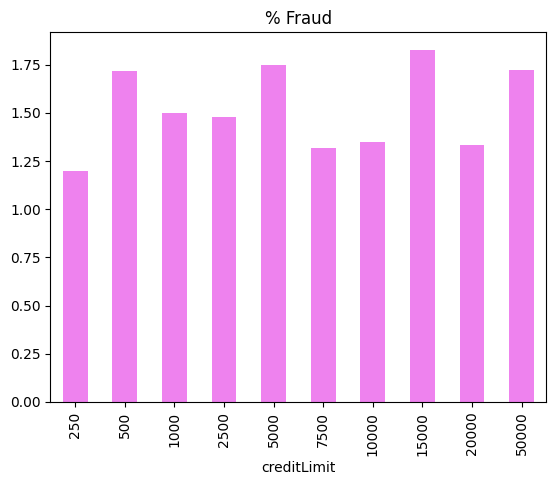

In [35]:
((df.groupby('creditLimit')['isFraud'].sum()/df.groupby('creditLimit')['isFraud'].count())*100).plot(kind='bar', color='violet',title = '% Fraud')

# Data Wrangling - Duplicate Transactions

In [36]:
df['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

In [37]:
## address verification - transaction type df
add_ver_df = df[df['transactionType'] == 'ADDRESS_VERIFICATION']

## missing transaction type df
missing_tran_ty_df = df[df['transactionType'] == '']

## Purchase - transaction type df
purchase_df = df[df['transactionType'] == 'PURCHASE']

## Reversal transaction type df
reverse_df = df[df['transactionType'] == 'REVERSAL']

In [38]:
## looking at Address verification transactions


add_ver_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
17,574788567,574788567,2500,2428.67,2016-01-26 14:04:22,0.0,Convenient Auto Services,US,US,09,01,auto,2025-08-01,2015-10-13,2015-10-13,206,206,8522,ADDRESS_VERIFICATION,71.33,0,0,0
60,574788567,574788567,2500,2500.00,2016-09-02 07:57:44,0.0,Washington Tire,US,US,09,01,auto,2027-04-01,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,0.00,0,0,0
78,574788567,574788567,2500,2208.54,2016-10-29 11:01:00,0.0,Fast Tire,US,US,09,08,auto,2026-12-01,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,291.46,0,0,0
102,924729945,924729945,50000,50000.00,2016-10-23 14:00:41,0.0,apple.com,US,US,09,08,online_retail,2027-11-01,2014-07-25,2014-07-25,205,205,9459,ADDRESS_VERIFICATION,0.00,0,0,0
116,984504651,984504651,50000,48562.35,2016-01-08 19:40:01,0.0,Walgreens #417535,US,US,05,08,health,2029-11-01,2015-07-27,2015-07-27,640,640,8332,ADDRESS_VERIFICATION,1437.65,0,0,0


> Above data frame shows transaction amount to be ZERO (checking if it is true for all the transactions)

In [39]:
add_ver_df['transactionAmount'].sum() 

0.0

In [40]:
missing_tran_ty_df['transactionAmount'].sum()

108459.78

In [41]:
reverse_df['transactionAmount'].sum()

2821792.5

In [42]:
purchase_df['transactionAmount'].sum()

104790305.25

## Reversed transactions

In [43]:
reverse_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,1,0,0
73,574788567,574788567,2500,2432.72,2016-10-07 10:23:57,3.87,Eazy Repair,US,US,05,01,auto,2022-10-01,2015-10-13,2015-10-13,579,579,4219,REVERSAL,67.28,1,0,0
101,924729945,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,0,0,0
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,0,0,0
156,984504651,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,1,0,0


In [44]:
len(reverse_df)

20303

In [45]:
## Doing an inner join of reverse transaction type dataframe with purchase transaction type dataframe

rev_pur_df = pd.merge(reverse_df,purchase_df,on=['accountNumber','customerId','transactionAmount','merchantName','cardCVV','cardLast4Digits'],how='inner')
rev_pur_df.head()

,accountNumber,customerId,creditLimit_x,availableMoney_x,transactionDateTime_x,transactionAmount,merchantName,acqCountry_x,merchantCountryCode_x,posEntryMode_x,posConditionCode_x,merchantCategoryCode_x,currentExpDate_x,accountOpenDate_x,dateOfLastAddressChange_x,cardCVV,enteredCVV_x,cardLast4Digits,transactionType_x,currentBalance_x,cardPresent_x,expirationDateKeyInMatch_x,isFraud_x,creditLimit_y,availableMoney_y,transactionDateTime_y,acqCountry_y,merchantCountryCode_y,posEntryMode_y,posConditionCode_y,merchantCategoryCode_y,currentExpDate_y,accountOpenDate_y,dateOfLastAddressChange_y,enteredCVV_y,transactionType_y,currentBalance_y,cardPresent_y,expirationDateKeyInMatch_y,isFraud_y
0,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,1,0,0,2500,2416.11,2016-05-24 01:35:33,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,PURCHASE,83.89,1,0,0
1,924729945,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,0,0,0,50000,50000.00,2016-10-04 04:20:04,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,265,PURCHASE,0.00,0,0,0
2,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,0,0,0,50000,46818.15,2016-01-16 09:52:30,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,PURCHASE,3181.85,0,0,0
3,984504651,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,1,0,0,50000,46341.05,2016-01-17 08:13:08,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,PURCHASE,3658.95,1,0,0
4,984504651,984504651,50000,38090.70,2016-02-04 00:14:42,83.64,1st Sandwitch Bar #801388,US,US,09,01,food,2025-11-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,11909.30,1,0,0,50000,49138.85,2016-01-06 04:08:06,US,US,09,01,food,2025-11-01,2015-07-27,2015-07-27,640,PURCHASE,861.15,1,0,0


In [46]:
len(rev_pur_df)

18126

In [47]:
rev_pur_df['reversal_time'] = rev_pur_df['transactionDateTime_x'] - rev_pur_df['transactionDateTime_y']

In [48]:
rev_pur_df['reversal_time'].min(),rev_pur_df['reversal_time'].max()

(Timedelta('-350 days +01:25:36'), Timedelta('318 days 07:02:35'))

> -ve reversal time seems unrealistic (need more business domain knowledge - could be due once reversal of monthly subscription charge being mapped to all the subscription purchases)


> Also 318 days for reversing the transactions seems too long (assuming 30 days to be standard will do the calcualtions)

(array([4.0000e+00, 1.0000e+00, 5.0000e+00, 1.5000e+01, 1.0000e+00,
        5.0000e+00, 6.0000e+00, 1.5000e+01, 1.5000e+01, 1.6000e+01,
        1.2765e+04, 5.2140e+03, 1.0000e+01, 1.6000e+01, 9.0000e+00,
        9.0000e+00, 6.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([-349.94055556, -316.52885475, -283.11715394, -249.70545312,
        -216.29375231, -182.8820515 , -149.47035069, -116.05864988,
         -82.64694907,  -49.23524826,  -15.82354745,   17.58815336,
          50.99985417,   84.41155498,  117.82325579,  151.2349566 ,
         184.64665741,  218.05835822,  251.47005903,  284.88175984,
         318.29346065]),
 <BarContainer object of 20 artists>)

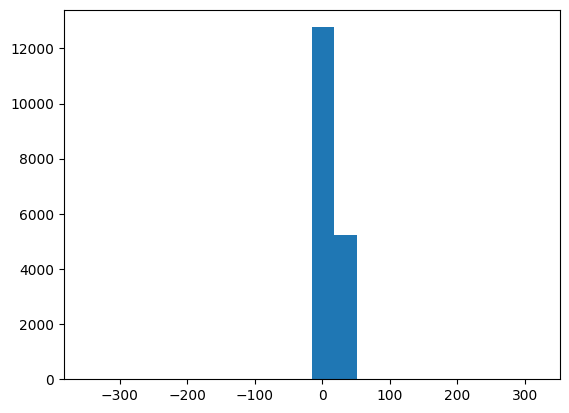

In [49]:
plt.hist(rev_pur_df['reversal_time']/pd.Timedelta(days = 1),bins = 20)

In [52]:
## For negative reversal time

invalid_rev_transactions_df = rev_pur_df[rev_pur_df['reversal_time'] < dt.timedelta(seconds = 0)]

In [53]:
invalid_rev_transactions_df.head()

,accountNumber,customerId,creditLimit_x,availableMoney_x,transactionDateTime_x,transactionAmount,merchantName,acqCountry_x,merchantCountryCode_x,posEntryMode_x,posConditionCode_x,merchantCategoryCode_x,currentExpDate_x,accountOpenDate_x,dateOfLastAddressChange_x,cardCVV,enteredCVV_x,cardLast4Digits,transactionType_x,currentBalance_x,cardPresent_x,expirationDateKeyInMatch_x,isFraud_x,creditLimit_y,availableMoney_y,transactionDateTime_y,acqCountry_y,merchantCountryCode_y,posEntryMode_y,posConditionCode_y,merchantCategoryCode_y,currentExpDate_y,accountOpenDate_y,dateOfLastAddressChange_y,enteredCVV_y,transactionType_y,currentBalance_y,cardPresent_y,expirationDateKeyInMatch_y,isFraud_y,reversal_time
815,442799740,442799740,15000,3595.31,2016-05-20 20:57:04,110.48,Uber,US,US,05,01,rideshare,2032-01-01,2015-10-28,2016-05-19,494,494,3018,REVERSAL,11404.69,0,0,0,15000,5952.48,2016-07-19 20:11:30,US,US,09,01,rideshare,2024-10-01,2015-10-28,2016-06-20,494,PURCHASE,9047.52,0,0,0,-60 days +00:45:34
1135,246251253,246251253,5000,2055.88,2016-03-14 05:33:34,279.82,Northtown Beauty,US,US,02,08,personal care,2032-01-01,2014-10-02,2016-02-11,455,455,6002,REVERSAL,2944.12,1,0,0,5000,2335.70,2016-03-14 05:35:50,US,US,02,08,personal care,2032-01-01,2014-10-02,2016-02-11,455,PURCHASE,2664.30,1,0,0,-1 days +23:57:44
1182,246251253,246251253,5000,1561.61,2016-05-11 10:44:29,57.20,Krispy Kreme #491287,US,US,05,08,fastfood,2030-12-01,2014-10-02,2016-04-22,455,455,6002,REVERSAL,3438.39,1,0,0,5000,1618.81,2016-05-11 10:45:45,US,US,05,08,fastfood,2030-12-01,2014-10-02,2016-04-22,455,PURCHASE,3381.19,1,0,0,-1 days +23:58:44
1183,246251253,246251253,5000,1561.61,2016-05-11 10:44:29,57.20,Krispy Kreme #491287,US,US,05,08,fastfood,2030-12-01,2014-10-02,2016-04-22,455,455,6002,REVERSAL,3438.39,1,0,0,5000,1561.61,2016-05-11 10:48:22,US,US,05,08,fastfood,2030-12-01,2014-10-02,2016-04-22,455,PURCHASE,3438.39,1,0,0,-1 days +23:56:07
1326,246251253,246251253,5000,2806.53,2016-12-13 03:22:32,315.48,staples.com,US,US,09,01,online_retail,2028-09-01,2014-10-02,2016-11-30,455,455,6002,REVERSAL,2193.47,0,0,0,5000,3122.01,2016-12-13 03:23:22,US,US,09,01,online_retail,2028-09-01,2014-10-02,2016-11-30,455,PURCHASE,1877.99,0,0,0,-1 days +23:59:10


In [54]:
# these negative one could once reversal of monthy 
# subscription being mapped (same customerID, account Number, transcation amount) to other months subscription

len(invalid_rev_transactions_df) 

133

In [55]:
len(rev_pur_df) - len(invalid_rev_transactions_df)

17993

In [56]:
# For calculating number of reversed transation (keeping in mind the reversal time to be > 0 seconds and < 30 days)

rev_pur_time_df = rev_pur_df[(rev_pur_df['reversal_time'] > dt.timedelta(seconds = 0)) & (rev_pur_df['reversal_time'] < dt.timedelta(days = 30))]

len(rev_pur_time_df)

17921

In [57]:
rev_pur_df['transactionAmount'].sum()

2713100.3099999996

In [58]:
reverse_df['transactionAmount'].sum() - rev_pur_df['transactionAmount'].sum()

108692.19000000041

> 108692 amount is extra reversed (trace of this amount not found in purchase amount)

In [59]:
rev_mis_df = pd.merge(reverse_df,missing_tran_ty_df,on=['accountNumber','customerId','transactionAmount','merchantName','cardCVV','cardLast4Digits'],how='inner')
rev_mis_df.head()

,accountNumber,customerId,creditLimit_x,availableMoney_x,transactionDateTime_x,transactionAmount,merchantName,acqCountry_x,merchantCountryCode_x,posEntryMode_x,posConditionCode_x,merchantCategoryCode_x,currentExpDate_x,accountOpenDate_x,dateOfLastAddressChange_x,cardCVV,enteredCVV_x,cardLast4Digits,transactionType_x,currentBalance_x,cardPresent_x,expirationDateKeyInMatch_x,isFraud_x,creditLimit_y,availableMoney_y,transactionDateTime_y,acqCountry_y,merchantCountryCode_y,posEntryMode_y,posConditionCode_y,merchantCategoryCode_y,currentExpDate_y,accountOpenDate_y,dateOfLastAddressChange_y,enteredCVV_y,transactionType_y,currentBalance_y,cardPresent_y,expirationDateKeyInMatch_y,isFraud_y
0,410523603,410523603,5000,2325.63,2016-03-23 22:57:38,315.73,Next Day eCards,US,US,05,01,online_gifts,2029-12-01,2015-06-25,2016-03-02,136,136,2701,REVERSAL,2674.37,0,0,0,5000,2641.36,2016-03-23 22:55:47,US,US,05,01,online_gifts,2029-12-01,2015-06-25,2016-03-02,136,,2358.64,0,0,0
1,318627230,318627230,1000,716.37,2016-12-20 06:14:01,260.56,Golds Gym #605427,US,US,09,08,health,2027-12-01,2013-06-23,2016-12-01,153,153,3938,REVERSAL,283.63,1,0,0,1000,204.72,2016-12-20 06:13:37,US,US,09,08,health,2027-12-01,2013-06-23,2016-12-01,153,,795.28,1,0,0
2,340103388,340103388,20000,15285.85,2016-05-17 19:29:21,123.04,Dunkin' Donuts #963251,US,US,09,01,fastfood,2032-12-01,2015-01-08,2016-03-18,791,791,3884,REVERSAL,4714.15,1,0,0,20000,3457.51,2016-04-18 22:50:47,US,US,09,01,fastfood,2032-12-01,2015-01-08,2016-03-18,791,,16542.49,1,0,0
3,132629755,132629755,5000,1512.22,2016-11-12 02:42:40,55.60,cheapfast.com,US,US,05,01,online_retail,2029-05-01,2015-12-17,2016-08-27,337,337,8208,REVERSAL,3487.78,0,0,0,5000,575.89,2016-10-21 11:02:42,US,US,05,01,online_retail,2029-05-01,2015-12-17,2016-08-27,337,,4424.11,0,0,0
4,380680241,380680241,5000,3248.34,2016-09-10 12:12:06,236.90,Next Day eCards,US,US,09,01,online_gifts,2024-05-01,2014-06-21,2016-09-01,869,869,593,REVERSAL,1751.66,0,0,0,5000,2883.96,2016-08-17 10:05:31,US,US,09,01,online_gifts,2024-05-01,2014-06-21,2016-08-15,869,,2116.04,0,0,0


In [60]:
rev_mis_df['transactionAmount'].sum()

2823.9

In [61]:
rev_pur_df['isFraud_x'].sum(),rev_pur_df['isFraud_y'].sum()

(312, 313)

> With this mapping there are 312 fraud transactions in reverse DF and 313 in purchase DF

## Multi swipe transactions

In [62]:
## Doinng an inner join of Purchase type df with itself

multi_swipe_df = pd.merge(purchase_df,purchase_df,on=['accountNumber','customerId','transactionAmount','merchantName','cardCVV','cardLast4Digits'],how='inner')

In [63]:
multi_swipe_df['time_lag'] = multi_swipe_df['transactionDateTime_x'] - multi_swipe_df['transactionDateTime_y']

In [64]:
len(multi_swipe_df)

1308669

In [65]:
# negative time lag

len(multi_swipe_df[multi_swipe_df['time_lag'] < dt.timedelta(seconds = 0)])

281738

In [66]:
# transaction which got joined to iteself 

same_transaction_df = multi_swipe_df[multi_swipe_df['time_lag'] == dt.timedelta(seconds = 0)]
len(same_transaction_df)

745193

In [67]:
# positive_time multi_swipe df

multi_swipe_pos_time_df = multi_swipe_df[multi_swipe_df['time_lag'] > dt.timedelta(seconds = 0)]

len(multi_swipe_pos_time_df)

281738

In [68]:
multi_swipe_pos_time_df['time_lag'].min(),multi_swipe_pos_time_df['time_lag'].max()

(Timedelta('0 days 00:00:01'), Timedelta('364 days 04:34:56'))

> 364 days for multi swipe time seems too long

> Capping the multi swipe definition to - transaction from same merchant Name, to the same account Number and customer Id and card within less than ONE HOUR

In [69]:
multi_swipe_pos_time_df = multi_swipe_pos_time_df[multi_swipe_pos_time_df['time_lag'] < dt.timedelta(hours = 1)]

len(multi_swipe_pos_time_df)

8135

In [70]:
multi_swipe_pos_time_df['time_lag'].min(),multi_swipe_pos_time_df['time_lag'].max()

(Timedelta('0 days 00:00:01'), Timedelta('0 days 00:09:10'))

In [71]:
multi_swipe_pos_time_df['transactionAmount'].sum()

1206611.33

In [72]:
multi_swipe_pos_time_df['isFraud_x'].sum(),multi_swipe_pos_time_df['isFraud_y'].sum()

(139, 139)

> There are 139 fraud transactions that happen with multi swipe case